# 2 Linear Algebra

## 2.7 Eigendecomposition

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = torch.Tensor([[1, 9], [2, 4.]])

A_eigvals, A_eigvecs = A.eig(eigenvectors=True)

# A_eigval[:,1] is imaginary part. We can omit this part as the contentss in the part are all 0 here.
A_eigvals = A_eigvals[:,0].diag()

print("A: \n", A)
print("Eigenvalues of A: \n", A_eigvals) 
print("Eigenvectors of A: \n", A_eigvecs)
print("L2 Norm of an eigenvector: \n", A_eigvecs[:,0].norm(2))
print("Eigendecomposition of A: \n", A_eigvecs.matmul(A_eigvals).matmul(A_eigvecs.inverse()))

A: 
 tensor([[1., 9.],
        [2., 4.]])
Eigenvalues of A: 
 tensor([[-2.0000,  0.0000],
        [ 0.0000,  7.0000]])
Eigenvectors of A: 
 tensor([[-0.9487, -0.8321],
        [ 0.3162, -0.5547]])
L2 Norm of an eigenvector: 
 tensor(1.0000)
Eigendecomposition of A: 
 tensor([[1.0000, 9.0000],
        [2.0000, 4.0000]])


### Visualization of matrix multiplication

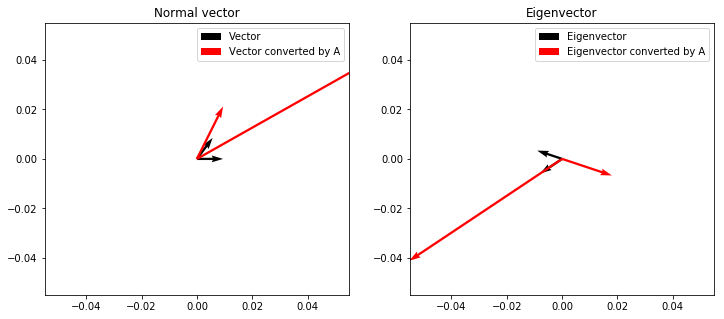

In [3]:
def show_2d_vectors(vectors, label, color):
    plt.quiver(0, 0, vectors[0,:].numpy(), vectors[1,:].numpy(), scale=100, units="xy", label=label, color=color)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title("Normal vector")
vectors = torch.FloatTensor([[0.6, 1.0], [0.8, 0.0]])
converted_vectors = A.matmul(vectors)
show_2d_vectors(vectors, label="Vector", color="black")
show_2d_vectors(converted_vectors, label="Vector converted by A", color="red")
plt.legend()

plt.subplot(122)
plt.title("Eigenvector")
converted_eigvecs = A.matmul(A_eigvecs)
show_2d_vectors(A_eigvecs, label="Eigenvector", color="black")
show_2d_vectors(converted_eigvecs, label="Eigenvector converted by A", color="red")
plt.legend()

### Symmetric matrix

In [4]:
A = torch.Tensor([[2, 4], [4, 2]])
A_eigvals, Q = A.eig(eigenvectors=True)
A_eigvals = A_eigvals[:,0].diag()
print("A: \n", A)
print("Eigenvalues of A: \n", A_eigvals)
print("Q (Eigenvectors of A): \n", Q)
print("Check if Q is an authogonal matrix by calculating L2 norms of each row and column: \n",
      Q[0,:].norm(2), Q[1,:].norm(2), Q[:,0].norm(2), Q[:,1].norm(2))
print("Eigendecomposition of A: \n", Q.matmul(A_eigvals).matmul(Q.t()))

A: 
 tensor([[2., 4.],
        [4., 2.]])
Eigenvalues of A: 
 tensor([[ 6.,  0.],
        [ 0., -2.]])
Q (Eigenvectors of A): 
 tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])
Check if Q is an authogonal matrix by calculating L2 norms of each row and column: 
 tensor(1.) tensor(1.) tensor(1.0000) tensor(1.0000)
Eigendecomposition of A: 
 tensor([[2.0000, 4.0000],
        [4.0000, 2.0000]])
